In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

print ("Hi, to help me with this project")
time.sleep(1.25)
print ("Sign up!")
time.sleep(1.3)

#REJESTRACJA#

import tkinter as tkr

master = tkr.Tk()
userlist = []



"""Register window"""
master.title("Register")
master.geometry("250x150")

tkr.Label(master, text="New user registration").grid(row=0, columnspan=3)
tkr.Label(master, text="Nickname").grid(row=1)
tkr.Label(master, text="Email Address").grid(row=2)
tkr.Label(master, text="Password").grid(row=3)


e1 = tkr.Entry(master)
e2 = tkr.Entry(master)
e3 = tkr.Entry(master,show='*')


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)



def rejestracja():
    userlist.append([e1.get(), e2.get(), e3.get()])
    print(userlist)
    userverification = tkr.Tk()
    userverification.title("New user registration")
    userverification.geometry("180x100")
    tkr.Label(userverification, text="Your account has been created successfully!").grid(row=1)

"""Przyciski"""
button1 = tkr.Button(master, width=10,height=1, text="Register", command=rejestracja)
button1.grid(row=4,column=1, padx=3, pady=3)
button2 = tkr.Button(master, width=18,height=1, text="I don't want to register", command=master.destroy)
button2.grid(row=4,column=0, padx=3, pady=3)

tkr.mainloop()

print("")
print("Let's start!")
print("")
time.sleep(1)
print ("My LSTM model predict bitcoin price")

Hi, to help me with this project
Sign up!
[['', '', '']]

Let's start!

My LSTM model predict bitcoin price


In [2]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
data_training = data[data['Date']< '2020-07-07']
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2115,2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2116,2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2117,2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2118,2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143


In [5]:
data_test = data[data['Date']>= '2020-07-07']
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2120,2020-07-07,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652595
2121,2020-07-08,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
2122,2020-07-09,9427.994141,9431.378906,9234.999023,9277.967773,9277.967773,18000702524
2123,2020-07-10,9273.357422,9287.471680,9118.001953,9278.807617,9278.807617,16860035605
2124,2020-07-11,9277.511719,9293.532227,9199.485352,9240.346680,9240.346680,13249910444
...,...,...,...,...,...,...,...
2342,2021-02-14,47114.507813,49487.640625,47114.507813,48717.289063,48717.289063,71248675228
2343,2021-02-15,48696.535156,48875.570313,46347.476563,47945.058594,47945.058594,77069903166
2344,2021-02-16,49154.136384,51271.873321,49154.142124,51932.972390,51932.972390,78037666372
2345,2021-02-17,49207.277344,52533.914063,49072.378906,52149.007813,52149.007813,80820545404


In [6]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
data_training.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        2.04208427e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        3.85277136e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        4.31621846e-04],
       ...,
       [4.61546236e-01, 4.51347964e-01, 4.72388116e-01, 4.63494355e-01,
        1.65670558e-01],
       [4.63715137e-01, 4.50285831e-01, 4.68313451e-01, 4.60463919e-01,
        1.73935838e-01],
       [4.60956369e-01, 4.61016230e-01, 4.72655855e-01, 4.76071744e-01,
        2.41175211e-01]])

In [8]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape, y_train.shape

((2060, 60, 5), (2060,))

In [10]:
# lSTM

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM

In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [13]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
65/65 [==============================] - 10s 79ms/step - loss: 0.0299
Epoch 2/25
65/65 [==============================] - 5s 82ms/step - loss: 0.0039
Epoch 3/25
65/65 [==============================] - 5s 80ms/step - loss: 0.0030
Epoch 4/25
65/65 [==============================] - 5s 84ms/step - loss: 0.0026
Epoch 5/25
65/65 [==============================] - 6s 86ms/step - loss: 0.0030
Epoch 6/25
65/65 [==============================] - 6s 88ms/step - loss: 0.0028
Epoch 7/25
65/65 [==============================] - 6s 97ms/step - loss: 0.0020
Epoch 8/25
65/65 [==============================] - 6s 94ms/step - loss: 0.0021
Epoch 9/25
65/65 [==============================] - 6s 93ms/step - loss: 0.0015: 1
Epoch 10/25
65/65 [==============================] - 6s 95ms/step - loss: 0.0017
Epoch 11/25
65/65 [==============================] - 6s 95ms/step - loss: 0.0018
Epoch 12/25
65/65 [==============================] - 6s 99ms/step - loss: 0.0015
Epoch 13/25
65/65 [==============

In [16]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2120,2020-07-07,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652595
2121,2020-07-08,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
2122,2020-07-09,9427.994141,9431.378906,9234.999023,9277.967773,9277.967773,18000702524
2123,2020-07-10,9273.357422,9287.471680,9118.001953,9278.807617,9278.807617,16860035605
2124,2020-07-11,9277.511719,9293.532227,9199.485352,9240.346680,9240.346680,13249910444


In [17]:
data_training = data[data['Date']<'2020-07-07']
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
2060,2020-05-08,9936.162109,9996.743164,9767.172852,9842.666016,9842.666016,51780748042
2061,2020-05-09,9840.906250,9913.863281,9580.644531,9593.896484,9593.896484,46566121841
2062,2020-05-10,9591.168945,9595.581055,8395.107422,8756.430664,8756.430664,63325279337
2063,2020-05-11,8755.535156,9033.470703,8374.323242,8601.795898,8601.795898,57119858802
2064,2020-05-12,8610.385742,8949.898438,8569.643555,8804.477539,8804.477539,42142717533
2065,2020-05-13,8805.387695,9317.878906,8805.387695,9269.987305,9269.987305,45558144023
2066,2020-05-14,9271.329102,9793.268555,9255.035156,9733.721680,9733.721680,56426907637
2067,2020-05-15,9734.291016,9755.828125,9261.398438,9328.197266,9328.197266,48158802327
2068,2020-05-16,9333.240234,9564.205078,9260.694336,9377.013672,9377.013672,36164766408
2069,2020-05-17,9374.929688,9823.001953,9349.545898,9670.739258,9670.739258,40084250663


In [18]:
past_60_days = data_training.tail(60)

In [19]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,9936.162109,9996.743164,9767.172852,9842.666016,51780748042
1,9840.906250,9913.863281,9580.644531,9593.896484,46566121841
2,9591.168945,9595.581055,8395.107422,8756.430664,63325279337
3,8755.535156,9033.470703,8374.323242,8601.795898,57119858802
4,8610.385742,8949.898438,8569.643555,8804.477539,42142717533


In [20]:
inputs = scaler.transform(df)
inputs

array([[0.50569013, 0.49227146, 0.5103373 , 0.50025437, 0.69823648],
       [0.50075431, 0.48810188, 0.50041695, 0.48737764, 0.62791192],
       [0.48781382, 0.4720895 , 0.43736515, 0.44402897, 0.85392626],
       ...,
       [2.53782494, 2.5687705 , 2.60510032, 2.67892089, 1.05233782],
       [2.54057852, 2.63226216, 2.60075181, 2.69010326, 1.08986779],
       [2.69121167, 2.6291556 , 2.70983647, 2.68062864, 0.73165049]])

In [21]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((227, 60, 5), (227,))

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       1.34860207e-11])

In [24]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [25]:
y_pred = y_pred*scale
y_test = y_test*scale

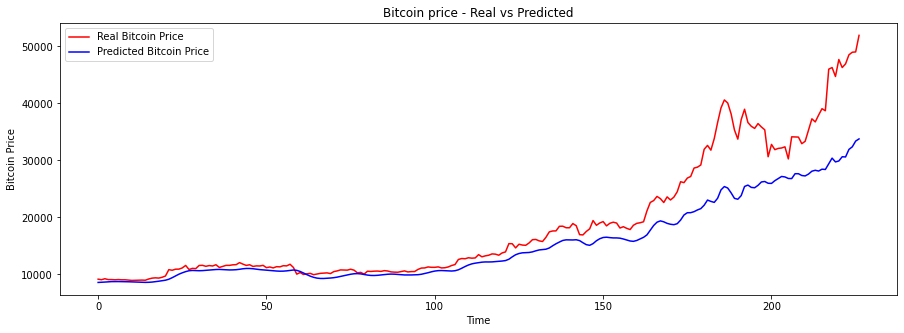

In [26]:
### Chart ###

plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin price - Real vs Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

